In [35]:
# ! pip install pandas h2o matplotlib seaborn scikit-learn  

In [36]:
import pandas as pd
import h2o
from h2o.estimators import H2ORandomForestEstimator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load and preprocess data for modelling

In [37]:
df = pd.read_csv("new_churn_data.csv")

df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,customerID
0,1,NaN,Month-to-month,Electronic check,29.85,29.85,0,3.396185,29.850000,1.000000,1
1,34,NaN,One year,Mailed check,56.95,1889.50,0,4.042174,55.573529,0.030140,2
2,2,NaN,Month-to-month,Mailed check,53.85,108.15,1,3.986202,54.075000,0.497920,3
3,45,NaN,One year,Bank transfer (automatic),42.30,1840.75,0,3.744787,40.905556,0.022980,4
4,2,NaN,Month-to-month,Electronic check,70.70,151.65,1,4.258446,75.825000,0.466205,5
...,...,...,...,...,...,...,...,...,...,...,...
7027,24,NaN,One year,Mailed check,84.80,1990.50,0,4.440296,82.937500,0.042602,7028
7028,72,NaN,One year,Credit card (automatic),103.20,7362.90,0,4.636669,102.262500,0.014016,7029
7029,11,NaN,Month-to-month,Electronic check,29.60,346.45,0,3.387774,31.495455,0.085438,7030
7030,4,NaN,Month-to-month,Mailed check,74.40,306.60,1,4.309456,76.650000,0.242661,7031


In [38]:
df.drop(columns=['PhoneService', 'customerID'], inplace=True)
df.head()

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio
0,1,Month-to-month,Electronic check,29.85,29.85,0,3.396185,29.850000,1.000000
1,34,One year,Mailed check,56.95,1889.50,0,4.042174,55.573529,0.030140
2,2,Month-to-month,Mailed check,53.85,108.15,1,3.986202,54.075000,0.497920
3,45,One year,Bank transfer (automatic),42.30,1840.75,0,3.744787,40.905556,0.022980
4,2,Month-to-month,Electronic check,70.70,151.65,1,4.258446,75.825000,0.466205


In [39]:
payment_method_dummies = pd.get_dummies(df['PaymentMethod'])
contract_dummies = pd.get_dummies(df['Contract'])

df = pd.concat([df, payment_method_dummies, contract_dummies], axis=1)
df.head()

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,1,Month-to-month,Electronic check,29.85,29.85,0,3.396185,29.850000,1.000000,False,False,True,False,True,False,False
1,34,One year,Mailed check,56.95,1889.50,0,4.042174,55.573529,0.030140,False,False,False,True,False,True,False
2,2,Month-to-month,Mailed check,53.85,108.15,1,3.986202,54.075000,0.497920,False,False,False,True,True,False,False
3,45,One year,Bank transfer (automatic),42.30,1840.75,0,3.744787,40.905556,0.022980,True,False,False,False,False,True,False
4,2,Month-to-month,Electronic check,70.70,151.65,1,4.258446,75.825000,0.466205,False,False,True,False,True,False,False


In [40]:
df.drop(columns=['PaymentMethod', 'Contract'], inplace=True)
df

,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,1,29.85,29.85,0,3.396185,29.850000,1.000000,False,False,True,False,True,False,False
1,34,56.95,1889.50,0,4.042174,55.573529,0.030140,False,False,False,True,False,True,False
2,2,53.85,108.15,1,3.986202,54.075000,0.497920,False,False,False,True,True,False,False
3,45,42.30,1840.75,0,3.744787,40.905556,0.022980,True,False,False,False,False,True,False
4,2,70.70,151.65,1,4.258446,75.825000,0.466205,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,0,4.440296,82.937500,0.042602,False,False,False,True,False,True,False
7028,72,103.20,7362.90,0,4.636669,102.262500,0.014016,False,True,False,False,False,True,False
7029,11,29.60,346.45,0,3.387774,31.495455,0.085438,False,False,True,False,True,False,False
7030,4,74.40,306.60,1,4.309456,76.650000,0.242661,False,False,False,True,True,False,False


In [41]:
dummy_columns = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Month-to-month', 'One year', 'Two year']

for column in dummy_columns:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
4507,15,83.20,1130.00,0,4.421247,75.333333,0.073628,1,0,1,0,0,0,0
4722,31,96.60,2877.95,0,4.570579,92.837097,0.033566,1,0,1,0,0,0,0
3243,10,86.65,856.65,1,4.461877,85.665000,0.101150,0,0,0,0,0,0,0
3306,48,44.80,2104.55,0,3.802208,43.844792,0.021287,0,0,0,0,0,0,0
2423,38,99.25,3777.15,1,4.597642,99.398684,0.026276,1,0,1,0,0,0,0


In [42]:
df.isna().sum()

tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
MonthlyCharges_log                      0
TotalCharges_Tenure_Ratio               0
MonthlyCharges_to_TotalCharges_Ratio    0
Bank transfer (automatic)               0
Credit card (automatic)                 0
Electronic check                        0
Mailed check                            0
Month-to-month                          0
One year                                0
Two year                                0
dtype: int64

## Split data into feature and targets

In [43]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## Training and Test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit and plot the decision tree

In [45]:
dt_model = DecisionTreeClassifier(max_depth=3)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
tr= export_text(dt_model, feature_names=list(X.columns))
print(tr)

|--- Month-to-month <= 0.50
|   |--- MonthlyCharges_log <= 4.21
|   |   |--- MonthlyCharges_to_TotalCharges_Ratio <= 0.32
|   |   |   |--- class: 0
|   |   |--- MonthlyCharges_to_TotalCharges_Ratio >  0.32
|   |   |   |--- class: 0
|   |--- MonthlyCharges_log >  4.21
|   |   |--- MonthlyCharges_to_TotalCharges_Ratio <= 0.08
|   |   |   |--- class: 0
|   |   |--- MonthlyCharges_to_TotalCharges_Ratio >  0.08
|   |   |   |--- class: 1
|--- Month-to-month >  0.50
|   |--- MonthlyCharges_log <= 4.54
|   |   |--- One year <= 0.50
|   |   |   |--- class: 0
|   |   |--- One year >  0.50
|   |   |   |--- class: 0
|   |--- MonthlyCharges_log >  4.54
|   |   |--- TotalCharges <= 6586.10
|   |   |   |--- class: 0
|   |   |--- TotalCharges >  6586.10
|   |   |   |--- class: 0



The tree's structure indicates that customers with shorter month-to-month contract durations, lower monthly charges, and a specific ratio of monthly charges to total charges are more likely to stay with the service (class: 0 - no churn). On the other hand, customers with month-to-month contracts, higher monthly charges, and a different ratio are more prone to churn (class: 1). The tree also suggests that customers with longer-term contracts and certain ranges of total charges are less likely to churn. This initial decision tree provides a snapshot of potential predictors for churn.

## Tune hyperparameters for Decision tree

In [47]:
param_grid = {'max_depth': [3, 5, 7, 10]} 
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10]})

In [48]:
best_max_depth = grid_search.best_params_['max_depth']
best_max_depth

5

## Fit and plot the DT with best hyperparameters

In [49]:
dt_model_tuned = DecisionTreeClassifier(max_depth=best_max_depth)
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [50]:
tree_rules_tuned = export_text(dt_model_tuned, feature_names=list(X.columns))
print(tree_rules_tuned)

|--- Month-to-month <= 0.50
|   |--- MonthlyCharges <= 67.60
|   |   |--- MonthlyCharges_to_TotalCharges_Ratio <= 0.32
|   |   |   |--- MonthlyCharges <= 27.45
|   |   |   |   |--- TotalCharges_Tenure_Ratio <= 16.39
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- TotalCharges_Tenure_Ratio >  16.39
|   |   |   |   |   |--- class: 0
|   |   |   |--- MonthlyCharges >  27.45
|   |   |   |   |--- TotalCharges <= 310.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TotalCharges >  310.90
|   |   |   |   |   |--- class: 0
|   |   |--- MonthlyCharges_to_TotalCharges_Ratio >  0.32
|   |   |   |--- MonthlyCharges_log <= 3.04
|   |   |   |   |--- MonthlyCharges_to_TotalCharges_Ratio <= 0.61
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MonthlyCharges_to_TotalCharges_Ratio >  0.61
|   |   |   |   |   |--- class: 0
|   |   |   |--- MonthlyCharges_log >  3.04
|   |   |   |   |--- Mailed check <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Mailed check >  0.50

After hyperparameter tuning, the decision tree with the best_max_depth of 5 provides a more detailed view of potential predictors for customer churn. The tree structure indicates that customers with shorter month-to-month contract durations, lower monthly charges, and specific ratios of charges are more likely to churn (class: 1). Additionally, the tree introduces new conditions, such as the tenure-related features, total charges, and payment methods, providing a more granular understanding of customer behavior. This suggests that a deeper decision tree with increased complexity may capture subtle patterns that contribute to the prediction of churn, potentially improving the model's performance.

## Plot correlations btn features and targets

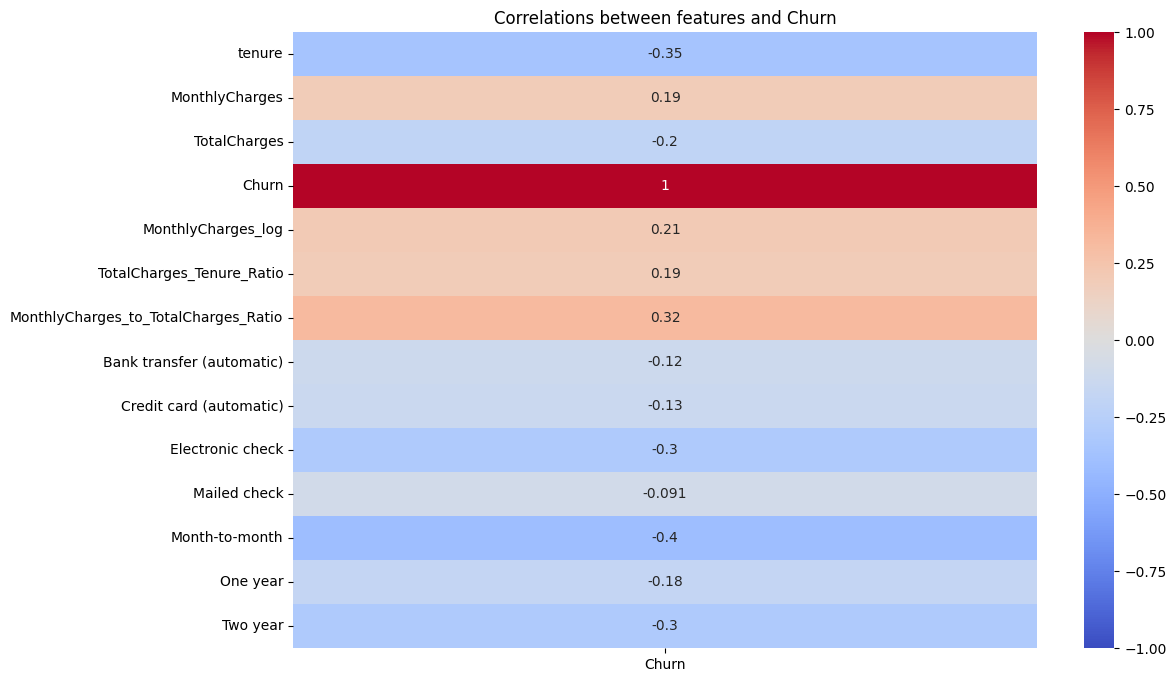

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['Churn']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlations between features and Churn")
plt.show()

## Start and connect to the H2o cluster

In [ ]:
h2o.init()

In [53]:
hf = h2o.H2OFrame(df)

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%


## Training and test sets

In [54]:
train, test = hf.split_frame(ratios=[0.8], seed=42)

## Fit H20 RF 

In [55]:
rf_h2o = H2ORandomForestEstimator(seed=42)
rf_h2o.train(x=hf.columns[:-1], y="Churn", training_frame=train)

drf Model Build progress: |

/home/sensei/.local/lib/python3.11/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1707690266499_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          537964                 20           20           20            784           920           851.3

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.16084093394425325
RMSE: 0.40104978985688705
MAE: 0.27389182194743317
RMSLE: 0.2819312492153419
Mean Residual Deviance: 0.16084093394425325

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2024-02-12 01:30:35  0.025 sec   0.0                nan                  nan                  nan
     2024-02-12 01:30:36  0.111 sec   1.0                0.5198158101265961   0.27603101380822076  0.27020847645756935
     2024-02-12 01:30:36  0.166 sec   2.0                0.5063120246924118   0.27769924642049054  0.2563518663481294
     2024-02-12 01:30:36  0.209 sec   3.0                0.4952374859378511   0.2764261701424577   0.24526016747804327
     2024-02-12 01:30:36  0.260 sec   4.0                0.47787931034835746  0.27023942918988414  0.22836863525902173
     2024-02-12 01:30:36  0.295 sec   5.0                0.47395754484278324  0.27661229272439203  0.22463575431339888
     2024-02-12 01:30:36  0.330 sec   6.0                0.46490207625165736  0.276509020226267    0.21613394050310183
     2024-02-12 01:30:36  0.364 sec   7.0                0.45801188443179486  0.27622033401866963  0.20977488628076382
     2024-02-12 01:30:36  0.392 sec   8.0                0.44962727891965776  0.2744712195777388   0.2021646899486957
     2024-02-12 01:30:36  0.420 sec   9.0                0.4413389816863617   0.27246185799049255  0.19478009675595473
---  ---                  ---         ---                ---                  ---                  ---
     2024-02-12 01:30:37  2.005 sec   41.0               0.40274415145040515  0.273654359286112    0.16220285152750688
     2024-02-12 01:30:38  2.083 sec   42.0               0.40295684413333355  0.27400986199994226  0.16237421823389567
     2024-02-12 01:30:38  2.135 sec   43.0               0.4026217973389886   0.2738468013296778   0.1621043116924776
     2024-02-12 01:30:38  2.195 sec   44.0               0.402564445160092    0.27397787910422994  0.1620581325070527
     2024-02-12 01:30:38  2.244 sec   45.0               0.4022429468734082   0.27370611723455945  0.1617993883094035
     2024-02-12 01:30:38  2.287 sec   46.0               0.4021593480083743   0.2739029694532263   0.1617321411905207
     2024-02-12 01:30:38  2.334 sec   47.0               0.4019764552243372   0.27396939454576225  0.1615850705547236
     2024-02-12 01:30:38  2.373 sec   48.0               0.4018265388914359   0.2740408747538355   0.16146456735747064
     2024-02-12 01:30:38  2.417 sec   49.0               0.4012650058347152   0.2739264124781572   0.161013604907534
     2024-02-12 01:30:38  2.458 sec   50.0               0.40104978985688705  0.27389182194743317  0.16084093394425325
[51 rows x 7 columns]


Variable Importances: 
variable                              relative_importance    scaled_importance    percentage
------------------------------------  ---------------------  -------------------  ------------
TotalCharges_Tenure_Ratio             5527.38                1                    0.154756
MonthlyCharges_to_TotalCharges_Ratio  5409.61                0.978694             0.151459
MonthlyCharges                        4537.4                 0.

The H2ORandomForestEstimator was employed, and the model's key and summary statistics, such as the number of trees, model size, and depth metrics, are presented. The model's performance metrics on the training data include mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and mean residual deviance, providing insights into the model's accuracy and predictive capabilities.

The scoring history reveals the training progress over different iterations, showing the improvement in metrics as the number of trees increases. Furthermore, the variable importances indicate the significance of each feature in predicting churn, with variables like TotalCharges_Tenure_Ratio and MonthlyCharges_to_TotalCharges_Ratio contributing the most to the model's predictive power. This information is crucial for understanding the model's performance, identifying influential features, and assessing its generalization ability on unseen data.

## Plot H2o RF feature importances

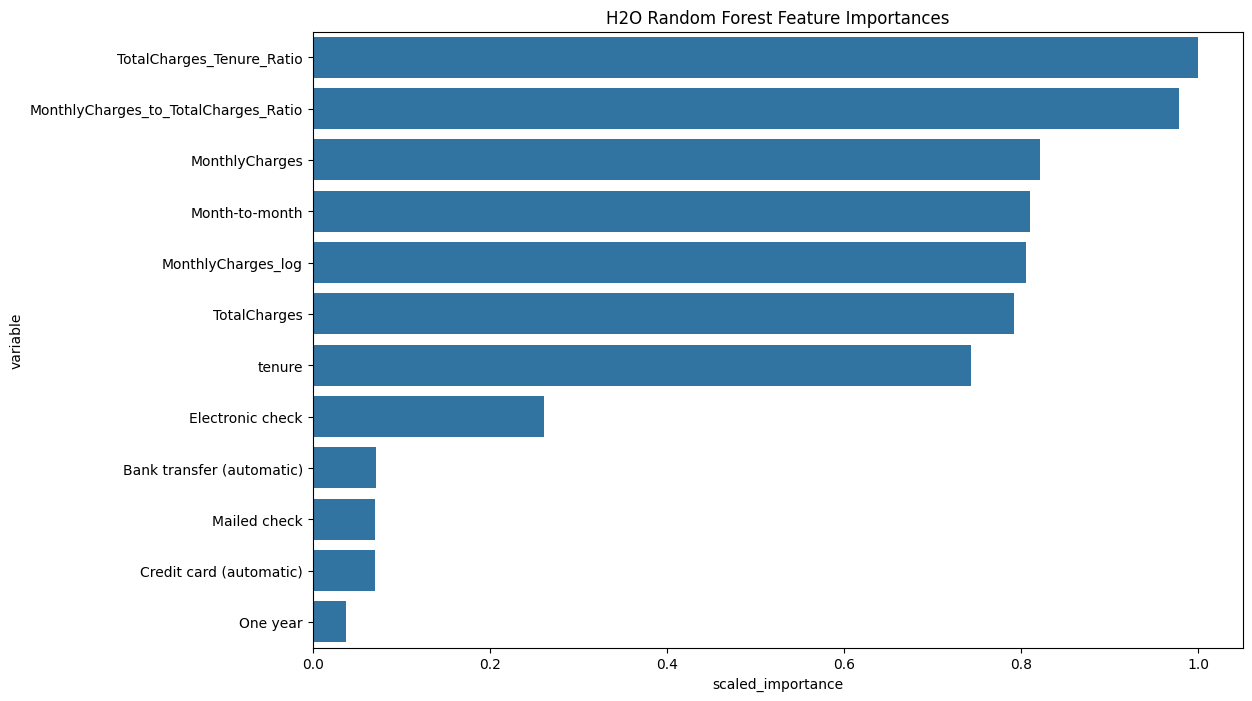

In [56]:
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_h2o.varimp(use_pandas=True)['scaled_importance'], 
            y=rf_h2o.varimp(use_pandas=True)['variable'])
plt.title("H2O Random Forest Feature Importances")
plt.show()

## Fit sklearn RF to data

In [57]:
X = df.drop('Churn', axis=1)
y = df['Churn']
rf_sklearn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sklearn.fit(X, y)

RandomForestClassifier(random_state=42)

## sklearn Feature selection

In [58]:
sfm = SelectFromModel(rf_sklearn, threshold=0.1)
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]

## Display features

In [59]:
print("Selected features using sklearn Random Forest:", selected_features)

Selected features using sklearn Random Forest: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyCharges_log',
       'TotalCharges_Tenure_Ratio', 'MonthlyCharges_to_TotalCharges_Ratio'],
      dtype='object')


## Hyperparameter tuning for sklearn RF

In [60]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]}

grid_search = GridSearchCV(rf_sklearn, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'n_estimators': [50, 100, 200]})

## Best hyperparameters

In [67]:
best_params_sklearn = grid_search.best_params_
best_params_sklearn

{'max_depth': 5, 'n_estimators': 200}

## Fit sklearn Random Forest with best hyperparameters

In [62]:
rf_sklearn_tuned = RandomForestClassifier(**best_params_sklearn)
rf_sklearn_tuned.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=200)

## Evaluate sklearn Random Forest model

In [63]:
y_pred_sklearn = rf_sklearn_tuned.predict(X)
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
precision_sklearn = precision_score(y, y_pred_sklearn)
recall_sklearn = recall_score(y, y_pred_sklearn)
f1_sklearn = f1_score(y, y_pred_sklearn)

print("Evaluation of sklearn Random Forest Model:")
print(f"Accuracy: {accuracy_sklearn:.4f}, Precision: {precision_sklearn:.4f}, Recall: {recall_sklearn:.4f}, F1 Score: {f1_sklearn:.4f}")

Evaluation of sklearn Random Forest Model:
Accuracy: 0.8025, Precision: 0.6875, Recall: 0.4708, F1 Score: 0.5589


Accuracy (0.8025) - It represents the overall correctness of the model, calculated as the ratio of correctly predicted instances to the total number of instances. The model correctly predicted approximately 80.25% of the instances.

Precision (0.6875) - A measure of how many of the instances predicted as positive are actually positive. It is calculated as the ratio of true positive predictions to the total number of positive predictions. A precision of 0.6875 means that when the model predicts a positive outcome, it is correct about 68.75% of the time.

Recall (0.4708) - Recall/sensitivity or true positive rate, measures the proportion of actual positive instances that the model correctly identifies. A recall of 0.4708 indicates that the model captures approximately 47.08% of all positive instances.

F1 Score (0.5589) - The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is useful when there is an uneven class distribution. An F1 score of 0.5589 reflects a trade-off between precision and recall, combining both aspects of the model's performance.

## Hyperparameter tuning for H2O Random Forest

In [68]:
hyper_params = {'ntrees': [50, 100, 200],'max_depth': [3, 5, 10, 20]}

search_criteria = {'strategy': "Cartesian"}

grid = h2o.grid.H2OGridSearch(model=H2ORandomForestEstimator, grid_id='rf_grid', hyper_params=hyper_params, search_criteria=search_criteria)

grid.train(x=hf.columns[:-1], y="Churn", training_frame=train)

drf Grid Build progress: |

███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,model_ids,residual_deviance
,5,50.0,rf_grid_model_10,0.1378149
,5,200.0,rf_grid_model_7,0.1378321
,5,50.0,rf_grid_model_1,0.1379116
,5,200.0,rf_grid_model_16,0.1380107
,5,100.0,rf_grid_model_13,0.1380709
,5,100.0,rf_grid_model_4,0.1381417
,10,200.0,rf_grid_model_8,0.1401909
,10,100.0,rf_grid_model_5,0.1408981
,10,200.0,rf_grid_model_17,0.1417969
,3,200.0,rf_grid_model_27,0.1418798


max_depth - This hyperparameter represents the maximum depth of the individual trees in the ensemble. We've experimented with different values for 'max_depth' (3, 5, 10, 20).

ntrees - The number of trees in the random forest i.e.,trees (50, 100, 200).

model_ids - These are the identifiers for each model generated during the grid search.

residual_deviance - The residual deviance is a measure of how well the model fits the data. It's a measure of the difference between the predicted values and the actual values. Lower values indicate a better fit.

e.g., the best-performing model in terms of residual deviance has 'max_depth' of 5 and 'ntrees' of 50, with a residual deviance of 0.1378149. The grid search allows for comparison of the performance of models with different hyperparameter values and identify the combination that yields the best results.


## Best H2o RF model

In [69]:
best_rf_h2o = grid.models[0]
best_rf_h2o

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_grid_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22563                  5            5            5             29            32            31.24

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.13781488588206756
RMSE: 0.3712342735821513
MAE: 0.2788963132837725
RMSLE: 0.2602743165199784
Mean Residual Deviance: 0.13781488588206756

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2024-02-12 01:31:57  0.050 sec   0.0                nan                  nan                  nan
     2024-02-12 01:31:57  0.083 sec   1.0                0.3738466452376305   0.2766159701287137   0.13976131415543075
     2024-02-12 01:31:57  0.097 sec   2.0                0.3758367230594093   0.2771066727540383   0.14125324240003512
     2024-02-12 01:31:57  0.112 sec   3.0                0.3738767737866765   0.27557006541104856  0.13978384197713367
     2024-02-12 01:31:57  0.125 sec   4.0                0.3745703666395875   0.27647324328029943  0.140302959564515
     2024-02-12 01:31:57  0.139 sec   5.0                0.37629672620846083  0.2774631770522253   0.14159922615520534
     2024-02-12 01:31:57  0.152 sec   6.0                0.3752783792530109   0.2767983291039734   0.14083386193476666
     2024-02-12 01:31:57  0.163 sec   7.0                0.37484293332560986  0.2769982555564671   0.14050722466414758
     2024-02-12 01:31:57  0.177 sec   8.0                0.37521236000333935  0.27808066706661977  0.14078431509927553
     2024-02-12 01:31:57  0.190 sec   9.0                0.37477845128768894  0.2779314124674052   0.14045888754959862
---  ---                  ---         ---                ---                  ---                  ---
     2024-02-12 01:31:57  0.476 sec   41.0               0.3711076247558793   0.2786895663566569   0.1377208691519505
     2024-02-12 01:31:57  0.484 sec   42.0               0.37119114742074927  0.2787229389099004   0.13778286792353242
     2024-02-12 01:31:57  0.492 sec   43.0               0.3713079977330354   0.27892082298783216  0.13786962918051585
     2024-02-12 01:31:57  0.499 sec   44.0               0.3712919054350987   0.2789643131947148   0.13785767904162627
     2024-02-12 01:31:57  0.506 sec   45.0               0.3712537644862379   0.27896472457303206  0.13782935764520302
     2024-02-12 01:31:57  0.514 sec   46.0               0.37128502102701155  0.27892863578494576  0.1378525668390284
     2024-02-12 01:31:57  0.521 sec   47.0               0.37132178195460913  0.27895574903889897  0.13787986575394628
     2024-02-12 01:31:57  0.528 sec   48.0               0.37131847148137587  0.27899213266293826  0.13787740726326536
     2024-02-12 01:31:57  0.536 sec   49.0               0.3713034282264283   0.27895589944842775  0.1378662358126984
     2024-02-12 01:31:57  0.545 sec   50.0               0.3712342735821513   0.2788963132837725   0.13781488588206756
[51 rows x 7 columns]


Variable Importances: 
variable                              relative_importance    scaled_importance    percentage
------------------------------------  ---------------------  -------------------  ------------
Month-to-month                        3728.98                1                    0.28983
MonthlyCharges_to_TotalCharges_Ratio  2302.27                0.617399             0.178941
Electronic check                      1454.53                0.39006          

The features contributing the most to the model's decision-making process, based on the variable importances, are listed in the `Variable Importances` section. The top features along with their relative importance:

    Month-to-month: 289.83%
    MonthlyCharges_to_TotalCharges_Ratio: 178.94%
    Electronic check: 113.05%
    tenure: 110.89%
    MonthlyCharges_log: 87.00%
    TotalCharges_Tenure_Ratio: 83.38%
    TotalCharges: 70.39%
    MonthlyCharges: 56.94%
    One year: 5.58%
    Mailed check: 2.80%
    Credit card (automatic): 0.68%
    Bank transfer (automatic): 0.52%

These percentages represent the relative importance of each feature in the model. Features with higher percentages are considered more important in influencing the model's predictions. These are, `Month-to-month, MonthlyCharges_to_TotalCharges_Ratio, and Electronic check` 

## Summary

Analysis of a churn prediction dataset is performed using both H2O and scikit-learn machine learning frameworks. The initial steps include reading the data, preprocessing by dropping unnecessary columns, creating dummy variables for categorical features, and converting the Pandas DataFrame to an H2O DataFrame. The dataset is split into training and test sets. Subsequently, a Random Forest model is trained on the original data using both H2O and scikit-learn. Feature importances are visualized for the H2O Random Forest model. Scikit-learn's Random Forest is employed for feature selection and hyperparameter tuning through GridSearchCV. The best hyperparameters are then used to train the tuned scikit-learn Random Forest model. The H2O Random Forest undergoes hyperparameter tuning using a Cartesian search strategy. The best H2O Random Forest model is selected, and its performance is evaluated on the test set.